In [14]:
import pandas as pd
import numpy as np
from scaling import standardize, normalize
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from collections import Counter

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from RandomForest import evaluate_rfc

In [3]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

all_files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df = pd.concat(all_files, axis=0, ignore_index=True)

untouched_df = pd.concat(all_files, axis=0, ignore_index=True)

In [4]:
df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name',  'distance', 'sin_time', 'cos_time', 'date_time',
                      'longitude', 'latitude', 'temperature', 'altitude'])

df = standardize(df, ['velocity', 'angle']) # standarize the data
df = normalize(df, ['velocity', 'angle'], 0, 1) # normalize the data

X = df.drop(['attack'], axis=1) # Features
y = df['attack'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('attack', axis=1), df['attack'], test_size=0.1, random_state=42, stratify=y)

In [5]:
# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Build SMOTE SRF model
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100, n_jobs=-1)

# Train SMOTE SRF
rf.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = rf.predict(X_test)

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the metrics you want to score on
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

cv = StratifiedKFold(n_splits=5)

# Perform K-fold cross-validation and get the scores on each fold
scores = cross_validate(rf, X_train_resampled, y_train_resampled, cv=cv, scoring=scoring)

# Print the average scores and their standard deviations
for metric in scoring:
    print("%s: %0.2f (+/- %0.2f)" % (metric, scores['test_'+metric].mean(), scores['test_'+metric].std() * 2))

accuracy: 0.98 (+/- 0.00)
precision: 0.01 (+/- 0.01)
recall: 0.01 (+/- 0.01)
f1: 0.01 (+/- 0.01)
roc_auc: 0.50 (+/- 0.02)


Fra chatGPT: 
The scores suggest that your model is predicting the majority class (i.e., non-attack) very well but is not doing well in predicting the minority class (i.e., attack).

The high accuracy score suggests that your model is correctly classifying the majority class instances, which is expected since the dataset is imbalanced and the majority class is dominant. However, the low precision, recall, and F1-score suggest that the model is not doing well in identifying the attack instances.

The precision score of 0.01 indicates that out of all the instances predicted as attacks by the model, only 1% are actually attacks. The recall score of 0.01 suggests that the model is identifying only 1% of the actual attack instances in the dataset. The F1-score of 0.01 is the harmonic mean of precision and recall and gives an overall measure of the model's performance. The low F1-score indicates that the model is not performing well in identifying the minority class instances.

Finally, the AUC-ROC score of 0.50 indicates that the model's predictions are no better than random guessing. The AUC-ROC score is a measure of the model's ability to distinguish between the two classes, and a score of 0.50 suggests that the model is not able to make meaningful predictions.

In summary, the scores suggest that your model is not doing well in identifying the attack instances in the dataset, and you may need to explore other techniques to address the class imbalance and improve the model's performance.

Accuracy: 88.43 %
[[21145  2466]
 [  305    34]]
              precision    recall  f1-score   support

           0      0.986     0.896     0.939     23611
           1      0.014     0.100     0.024       339

    accuracy                          0.884     23950
   macro avg      0.500     0.498     0.481     23950
weighted avg      0.972     0.884     0.926     23950



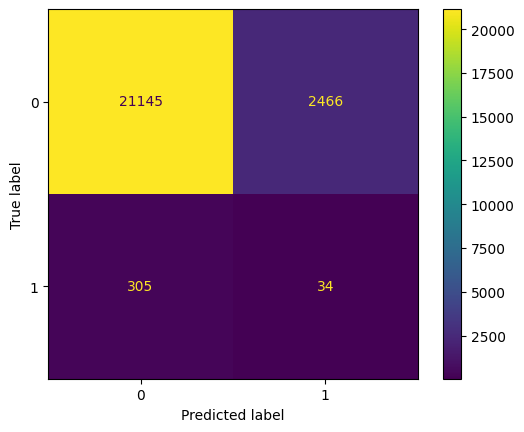

In [21]:
evaluate_rfc(SMOTE, y_test=y_test, y_pred=y_pred)

## bruk av forskjellig max depth

Accuracy: 75.18 %
[[17904  5707]
 [  237   102]]
              precision    recall  f1-score   support

           0      0.987     0.758     0.858     23611
           1      0.018     0.301     0.033       339

    accuracy                          0.752     23950
   macro avg      0.502     0.530     0.445     23950
weighted avg      0.973     0.752     0.846     23950



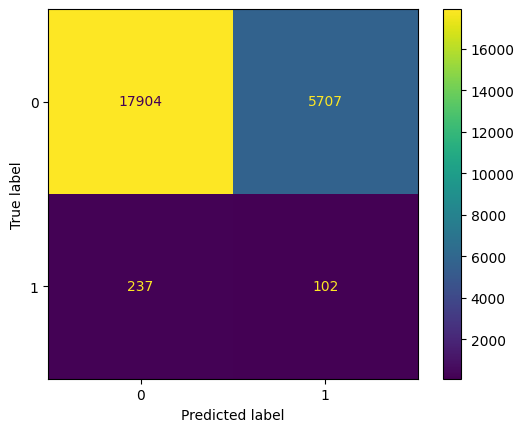

In [9]:
# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Build SMOTE SRF model
SMOTE = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, n_jobs=-1)

# Train SMOTE SRF
SMOTE.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = SMOTE.predict(X_test)
evaluate_rfc(SMOTE, y_test=y_test, y_pred=y_pred)

Accuracy: 87.75 %
[[20975  2636]
 [  299    40]]
              precision    recall  f1-score   support

           0      0.986     0.888     0.935     23611
           1      0.015     0.118     0.027       339

    accuracy                          0.877     23950
   macro avg      0.500     0.503     0.481     23950
weighted avg      0.972     0.877     0.922     23950



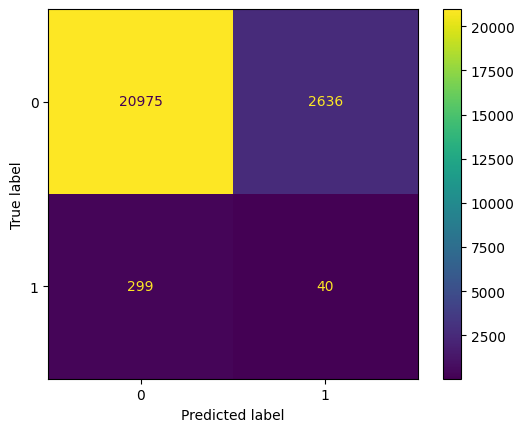

In [12]:
# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Build SMOTE SRF model
SMOTE = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=50, n_jobs=-1)

# Train SMOTE SRF
SMOTE.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = SMOTE.predict(X_test)
evaluate_rfc(SMOTE, y_test=y_test, y_pred=y_pred)

Accuracy: 82.75 %
[[19756  3855]
 [  276    63]]
              precision    recall  f1-score   support

           0      0.986     0.837     0.905     23611
           1      0.016     0.186     0.030       339

    accuracy                          0.828     23950
   macro avg      0.501     0.511     0.467     23950
weighted avg      0.972     0.828     0.893     23950



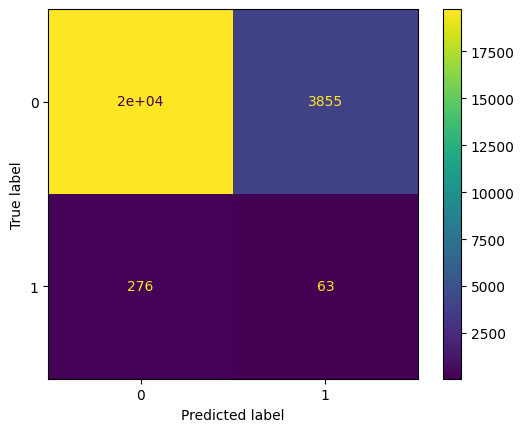

In [15]:
# Use SMOTE to oversample the minority class
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

# Build SMOTE SRF model
SMOTE = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, n_jobs=-1)

# Train SMOTE SRF
SMOTE.fit(X_train_resampled, y_train_resampled)

# SMOTE SRF prediction result
y_pred = SMOTE.predict(X_test)
evaluate_rfc(SMOTE, y_test=y_test, y_pred=y_pred)